# Ten Years Stroke project

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from pgmpy.estimators import HillClimbSearch, BicScore, PC, AICScore
from pgmpy.models import BayesianNetwork

In [4]:
dataframe = pd.read_csv('tenyear_stroke.csv')
dataframe.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
continuous_data = dataframe[['age','totChol','sysBP','diaBP','BMI','glucose']]
discrete_data = dataframe[['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']]

In [6]:
continuous_data

,age,totChol,sysBP,diaBP,BMI,glucose
0,39,195.0,106.0,70.0,26.97,77.0
1,46,250.0,121.0,81.0,28.73,76.0
2,48,245.0,127.5,80.0,25.34,70.0
3,61,225.0,150.0,95.0,28.58,103.0
4,46,285.0,130.0,84.0,23.10,85.0
...,...,...,...,...,...,...
4233,50,313.0,179.0,92.0,25.97,86.0
4234,51,207.0,126.5,80.0,19.71,68.0
4235,48,248.0,131.0,72.0,22.00,86.0
4236,44,210.0,126.5,87.0,19.16,NaN


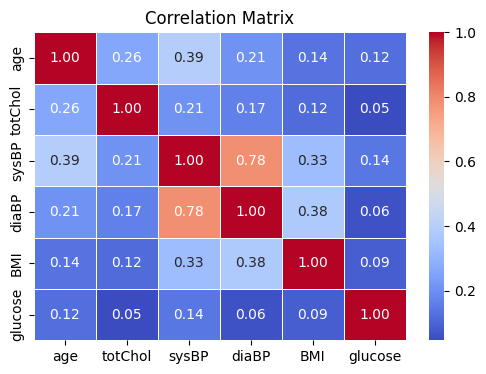

In [7]:
# Step 1: Calculate the correlation matrix
corr_matrix = continuous_data.corr()

# Step 2: Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 3: Show the plot
plt.title("Correlation Matrix")
plt.show()


In [8]:
from pgmpy.estimators.CITests import chi_square

print(chi_square(X='diabetes',Y='BMI', Z=[] ,data=dataframe, significance_level = 0.05))

False


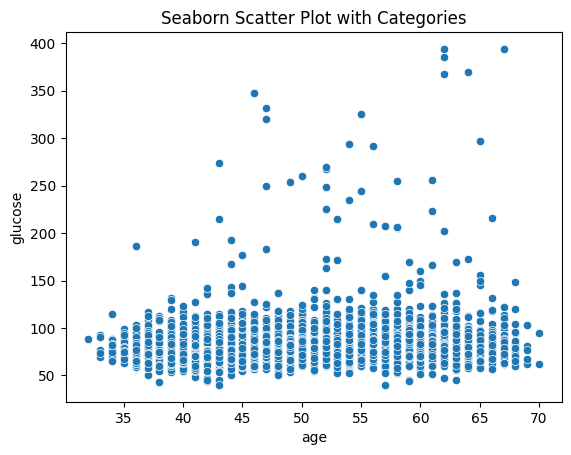

In [9]:
import seaborn as sns

# Scatter plot with hue
sns.scatterplot(data=dataframe, x='age', y='glucose')

plt.title('Seaborn Scatter Plot with Categories')
plt.show()




In [10]:
dataframe[dataframe['age']>=60]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
28,0,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
29,0,60,1.0,0,0.0,0.0,0,0,0,247.0,130.0,88.0,30.36,72.0,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,1,65,2.0,0,0.0,0.0,0,0,0,286.0,135.0,80.0,28.06,70.0,116.0,0
4215,0,63,1.0,0,0.0,0.0,0,1,1,236.0,155.0,82.0,39.17,78.0,79.0,0
4217,0,63,1.0,0,0.0,0.0,0,1,0,266.0,167.0,94.0,25.23,95.0,94.0,0
4220,1,60,1.0,0,0.0,0.0,0,0,0,252.0,128.0,82.0,21.18,75.0,70.0,1


# Detect outliers and filter the space



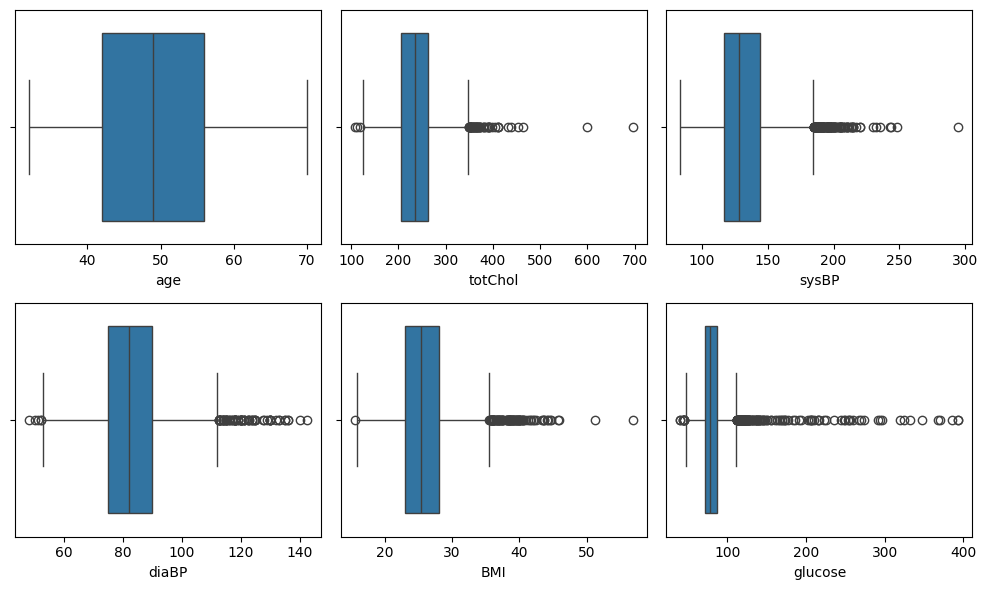

In [11]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Adjust size for better spacing

# Flatten the 2D array of axes to make indexing easier
axes = axes.flatten()
features = continuous_data.columns
# Plot a box plot for each feature
for i, feature in enumerate(features):
    sns.boxplot(x=continuous_data[feature], ax=axes[i])
    axes[i].set_xlabel(feature)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


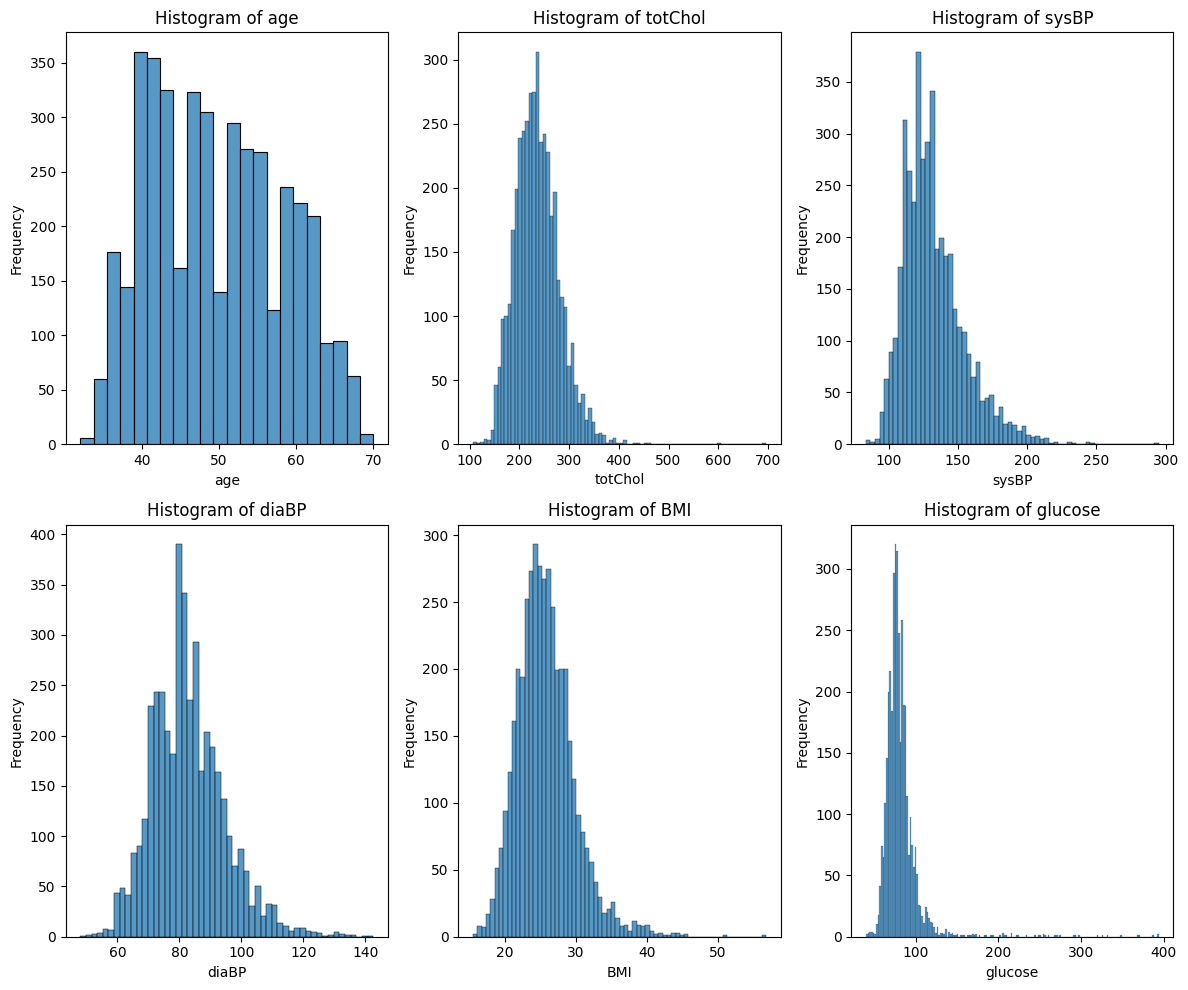

In [12]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 3, figsize=(12, 10))  # Adjust size for better spacing

# Flatten the 2D array of axes to make indexing easier
axes = axes.flatten()

# Plot a histogram for each feature
for i, feature in enumerate(features):
    sns.histplot(continuous_data[feature], kde=False, ax=axes[i])  # Change bins for granularity
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [13]:
continuous_data_cl = continuous_data.dropna()

In [14]:
from skimpy import skim 

skim(continuous_data_cl)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3826   │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ age        │    0 │      0 │   49.63 │   8.576 │      32 │      42 │     49 │      56 │      70 │  ▃█▇▇▅▂  │  │
│ │ totChol    │    0 │      0 │     237 │   44.76 │     113 │     206 │    234 │     264 │     696 │   ▄█▁    │  │
│ │ sysBP      │    0 │      0 │   132.5 │   22.09 │    83.5 │     117 │    128 │     144 │     295 │   ▄█▂    │  │
│ │ diaBP      │    0 │      0 │   82.95 │   11.97 │      48 │      75 │     82 │      90 │   142.5 │   ▁▆█▂   │  │
│ │ BMI        │    0 │      0 │   25.81 │   4.067 │   15.54 │   23.08 │   25.4 │   28.06 │    56.8 │   ▂█▂    │  │
│ │ glucose    │    0 │      0 │   81.92 │   23.76 │      40 │      71 │     78 │      87 │     394 │    █▁    │  │
│ └────────────┴──────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┴─────────┴─────────┴──────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [15]:
# Age
continuous_data_cl = continuous_data_cl[(continuous_data_cl['age'] >= 40) & (continuous_data_cl['age'] <= 65)]
continuous_data_cl['age'] = pd.cut(continuous_data_cl.age,bins=[39,49,59,66],labels=[0,1,2],ordered=False).astype(int)
# Cholesterol-level
continuous_data_cl = continuous_data_cl[(continuous_data_cl['totChol'] >= 50) & (continuous_data_cl['totChol'] <= 500)]
continuous_data_cl['totChol'] = pd.cut(continuous_data_cl.totChol,bins=[49,159,199,239,279,510],labels=[0,1,2,3,4],ordered=False).astype(int)
# Systolic-Pressure
continuous_data_cl = continuous_data_cl[(continuous_data_cl['sysBP'] >= 40) & (continuous_data_cl['sysBP'] <= 250)]
# Diastolic-Pressure
continuous_data_cl = continuous_data_cl[(continuous_data_cl['diaBP'] >= 40) &(continuous_data_cl['diaBP'] <= 140)]
# Body Mass Index 
continuous_data_cl = continuous_data_cl[(continuous_data_cl['BMI'] <= 50)]
continuous_data_cl['BMI'] = pd.cut(continuous_data_cl.BMI,bins=[15.,18.5,24.9,29.9,34.9,50],labels=[0,1,2,3,4],ordered=False).astype(int)
# Glucose level
continuous_data_cl = continuous_data_cl[(continuous_data_cl['glucose'] <= 150)]
continuous_data_cl['glucose'] = pd.cut(continuous_data_cl.glucose,bins=[35,69,99,125,155],labels=[0,1,2,3],ordered=False).astype(int)


In [16]:
# Create a Blood pressure variable

bloodP= []

for i,sys in enumerate(continuous_data_cl.sysBP.values):
    dia = continuous_data_cl.diaBP.values[i]

    if (sys<=90 and dia<=60):
        blood = 0
    elif (sys<=120 and dia<=80):
        blood = 1
    elif (sys<=140 and dia<=90):
        blood = 2
    else: 
        blood = 3
    bloodP.append(blood)
    
continuous_data_cl['BloodP'] = bloodP

In [17]:
continuous_data_cl.columns=['A','C','SBP','DBP','BMI','GLU','BP']
discrete_data.columns = ['GEN','SM','PS','PH','D','TYS']

dataset = pd.concat([continuous_data_cl,discrete_data],axis=1)
dataset = dataset.drop(['SBP','DBP','PH'],axis=1)

dataset.head()

,A,C,BMI,GLU,BP,GEN,SM,PS,D,TYS
1,0.0,3.0,2.0,1.0,2.0,0,0,0,0,0
2,0.0,3.0,2.0,1.0,2.0,1,1,0,0,0
3,2.0,2.0,2.0,2.0,3.0,0,1,0,0,1
4,0.0,4.0,1.0,1.0,2.0,0,1,0,0,0
5,0.0,2.0,3.0,1.0,3.0,0,0,0,0,0


In [18]:
from pgmpy.estimators.CITests import chi_square

print(chi_square(X='SM',Y='TYS', Z=[] ,data=dataset, significance_level = 0.05))

True


# Definition of the Network 

In [19]:
edges_1 = [ ('A','BMI'),('GEN','BMI'),('SM','BMI'),
            ('BMI','GLU'),('BMI','C'),('A','C'),('A','GLU'),('GEN','C'),('GEN','GLU'),
            ('GLU','BP'),('C','BP'),
            ('GLU','D'),('GLU','PS'),('C','D'),('C','PS'),
            ('BP','D'),('BP','PS'),
            ('D','TYS'),('BP','TYS'),('PS','TYS')
        ]

model_1 = BayesianNetwork(edges_1)

from pgmpy.estimators import MaximumLikelihoodEstimator

# Fit the CPDs using MaximumLikelihoodEstimator
model_1.fit(dataset, estimator=MaximumLikelihoodEstimator)

model_1.check_model()

True

In [21]:
edges_2 = [ ('A','BP'),('GEN','BP'),
            ('A','C'),('A','GLU'),('GEN','C'),('GEN','GLU'),
            ('C','BP'),('GLU','D'),
            ('SM','BP'),
            ('D','TYS'),('BP','TYS'),('C','TYS')
        ]

model_2 = BayesianNetwork(edges_2)

# Fit the CPDs using MaximumLikelihoodEstimator
model_2.fit(dataset, estimator=MaximumLikelihoodEstimator)

model_2.check_model()

True

In [22]:
bic = BicScore(dataset)

print(f'Model_1 BIC: {bic.score(model_1)}')
print(f'Model_2 BIC: {bic.score(model_2)}')


Model_1 BIC: -26089.01463528742
Model_2 BIC: -21643.573334501238


# Design the model

# Making inference

In [ ]:
# Initializing the VariableElimination class

from pgmpy.inference import VariableElimination

infer = VariableElimination(model_2)

In [ ]:
# Computing the probability of bronc given smoke=no.
glu_infer = infer.query(variables=['TYS'], evidence={'BP':3,'D':1,'C':1})
print(glu_infer)

+--------+------------+
| TYS    |   phi(TYS) |
+========+============+
| TYS(0) |     0.7500 |
+--------+------------+
| TYS(1) |     0.2500 |
+--------+------------+
